In [12]:
import tensorflow as tf
from tensorflow.keras import layers
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-03-02 10:14:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-03-02 10:14:07 (118 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



# Covid19 image classification

In [13]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-f5e3d62c-06d9-dbd2-6466-1dceef95645d)


In [14]:
!unzip '/content/drive/MyDrive/Dataset/covid19_image_dataset/covid19_image_data.zip'

Archive:  /content/drive/MyDrive/Dataset/covid19_image_dataset/covid19_image_data.zip
  inflating: Covid19-dataset/test/Covid/0100.jpeg  
  inflating: Covid19-dataset/test/Covid/0102.jpeg  
  inflating: Covid19-dataset/test/Covid/0105.png  
  inflating: Covid19-dataset/test/Covid/0106.jpeg  
  inflating: Covid19-dataset/test/Covid/0108.jpeg  
  inflating: Covid19-dataset/test/Covid/0111.jpg  
  inflating: Covid19-dataset/test/Covid/0112.jpg  
  inflating: Covid19-dataset/test/Covid/0113.jpg  
  inflating: Covid19-dataset/test/Covid/0115.jpeg  
  inflating: Covid19-dataset/test/Covid/0118.jpeg  
  inflating: Covid19-dataset/test/Covid/0119.jpeg  
  inflating: Covid19-dataset/test/Covid/0120.jpg  
  inflating: Covid19-dataset/test/Covid/094.png  
  inflating: Covid19-dataset/test/Covid/096.png  
  inflating: Covid19-dataset/test/Covid/098.jpeg  
  inflating: Covid19-dataset/test/Covid/COVID-00003b.jpg  
  inflating: Covid19-dataset/test/Covid/COVID-00012.jpg  
  inflating: Covid19-datase

In [15]:
!ls Covid19-dataset

test  train


In [16]:
!ls Covid19-dataset/train

 Covid	 Normal  'Viral Pneumonia'


In [17]:
!ls Covid19-dataset/train/Covid

010.png   045.jpeg  069.jpg   09.png		COVID-00020.jpg
012.jpeg  046.jpeg  06.jpeg   COVID-00001.jpg	COVID-00021.jpg
015.jpg   047.jpeg  071.jpg   COVID-00002.jpg	COVID-00022.jpg
019.png   048.jpeg  072.jpeg  COVID-00003a.jpg	COVID-00023.jpg
01.jpeg   049.jpeg  073.jpg   COVID-00003b.jpg	COVID-00024.jpg
020.jpg   04.png    074.jpg   COVID-00004.jpg	COVID-00025.jpg
021.jpeg  050.jpeg  076.jpg   COVID-00005.jpg	COVID-00026.jpg
022.jpeg  051.jpeg  078.jpeg  COVID-00006.jpg	COVID-00027.jpg
024.jpeg  052.jpeg  079.jpeg  COVID-00007.jpg	COVID-00028.jpg
025.jpeg  053.jpeg  07.jpg    COVID-00008.jpg	COVID-00029.jpg
026.jpeg  054.jpeg  080.jpg   COVID-00009.jpg	COVID-00030.jpg
027.jpeg  055.jpeg  081.jpeg  COVID-00010.jpg	COVID-00031.jpg
02.jpeg   056.jpg   082.jpg   COVID-00011.jpg	COVID-00032.jpg
031.jpeg  057.jpeg  083.jpeg  COVID-00012.jpg	COVID-00033.jpg
032.jpeg  058.jpeg  084.jpeg  COVID-00013a.jpg	COVID-00034.jpg
033.png   059.jpeg  085.jpeg  COVID-00013b.jpg	COVID-00035.jpg
039.jpeg  06

In [18]:
import os

# Walk through pizza_steak directory and list number pf files
for dirpath, dirnames, filenames in os.walk("Covid19-dataset/"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'Covid19-dataset/'.
There are 3 directories and 0 images in 'Covid19-dataset/test'.
There are 0 directories and 26 images in 'Covid19-dataset/test/Covid'.
There are 0 directories and 20 images in 'Covid19-dataset/test/Viral Pneumonia'.
There are 0 directories and 20 images in 'Covid19-dataset/test/Normal'.
There are 3 directories and 0 images in 'Covid19-dataset/train'.
There are 0 directories and 111 images in 'Covid19-dataset/train/Covid'.
There are 0 directories and 70 images in 'Covid19-dataset/train/Viral Pneumonia'.
There are 0 directories and 70 images in 'Covid19-dataset/train/Normal'.


In [19]:
train_len = []
for dirpath, dirnames, filenames in os.walk("Covid19-dataset/train/"):
  train_len.append(len(filenames))
train_len = sum(train_len)

test_len = []
for dirpath, dirnames, filenames in os.walk("Covid19-dataset/test/"):
  test_len.append(len(filenames))
test_len = sum(test_len)

train_len, test_len

(251, 66)

In [20]:
import pathlib
import numpy as np
data_dir = pathlib.Path("Covid19-dataset/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = list(class_names)
print(class_names)

['Covid', 'Normal', 'Viral Pneumonia']


In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory(we'll view images from here)
  target_folder = target_dir + target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['053.jpeg']
Image shape: (1522, 1800, 3)


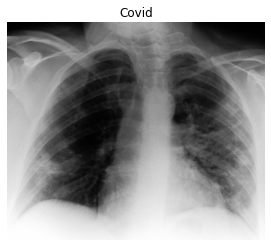

In [22]:
img = view_random_image(target_dir="Covid19-dataset/train/",
                        target_class='Covid')

In [23]:
tf.reduce_max(img), tf.reduce_min(img)

(<tf.Tensor: shape=(), dtype=uint8, numpy=255>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=0>)

## Preprocess & Train

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocess data (get all pixel values between 0 & 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = '/content/Covid19-dataset/train'
test_dir = '/content/Covid19-dataset/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir, 
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="categorical",
                                               shuffle = True,
                                               seed=42) # takes the path to a directory & generates bathes of augmented data
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               shuffle=False,
                                               seed=42)

# Build a cnn model (same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10,
                                                             kernel_size=3,
                                                             activation='relu',
                                                             input_shape=(224,224,3)),
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dropout(0.2),
                                      tf.keras.layers.Dense(32, activation='relu'),
                                      tf.keras.layers.Dense(len(class_names), activation='softmax')
])

# Compile our cnn
model_1.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data, 
                        epochs=10,
                        validation_data=valid_data)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Epoch 1/10
8/8 [==============================] - 21s 1s/step - loss: 0.9619 - accuracy: 0.6215 - val_loss: 0.7044 - val_accuracy: 0.8030
Epoch 2/10
8/8 [==============================] - 11s 1s/step - loss: 0.5027 - accuracy: 0.8327 - val_loss: 0.5836 - val_accuracy: 0.7576
Epoch 3/10
8/8 [==============================] - 10s 1s/step - loss: 0.3426 - accuracy: 0.8406 - val_loss: 0.4321 - val_accuracy: 0.7727
Epoch 4/10
8/8 [==============================] - 10s 1s/step - loss: 0.2094 - accuracy: 0.9124 - val_loss: 0.3731 - val_accuracy: 0.8030
Epoch 5/10
8/8 [==============================] - 11s 1s/step - loss: 0.1663 - accuracy: 0.9363 - val_loss: 0.3385 - val_accuracy: 0.8939
Epoch 6/10
8/8 [==============================] - 11s 1s/step - loss: 0.1404 - accuracy: 0.9442 - val_loss: 0.3158 - val_accuracy: 0.8788
Epoch 7/10
8/8 [==============================] - 10s 1s/step - loss: 0.1028 - accuracy: 0.

In [25]:
model_1.evaluate(valid_data)

3/3 [==============================] - 1s 392ms/step - loss: 0.2119 - accuracy: 0.9242


[0.21187609434127808, 0.9242424368858337]

In [26]:
# model_1.save('model_1.h5')
model_1.save('model_1')

INFO:tensorflow:Assets written to: model_1/assets


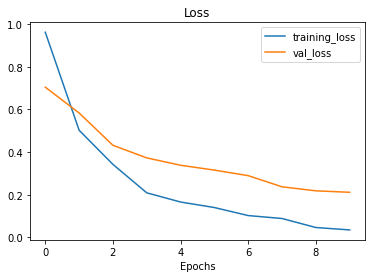

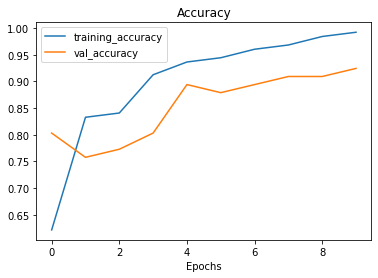

In [27]:
from helper_functions import plot_loss_curves
plot_loss_curves(history=history_1)

## Make predictions on validation set

In [28]:
pred_prob = model_1.predict(valid_data, verbose=1)

3/3 [==============================] - 1s 400ms/step


In [29]:
pred_prob

array([[9.99986887e-01, 4.59281591e-06, 8.51621189e-06],
       [1.00000000e+00, 7.96547966e-11, 6.78787204e-09],
       [9.94789124e-01, 9.01042222e-06, 5.20190829e-03],
       [9.99997973e-01, 3.36866557e-09, 2.04648427e-06],
       [9.99996662e-01, 1.61923264e-09, 3.31958222e-06],
       [9.99890208e-01, 3.09897478e-05, 7.87558747e-05],
       [9.99977589e-01, 1.01820233e-05, 1.22417769e-05],
       [9.99281108e-01, 2.51362871e-05, 6.93739683e-04],
       [9.99982953e-01, 2.34806339e-06, 1.46655339e-05],
       [2.69672632e-01, 6.87906206e-01, 4.24211882e-02],
       [8.07102919e-01, 2.47756288e-05, 1.92872256e-01],
       [9.99951363e-01, 2.59888693e-05, 2.26545162e-05],
       [9.99959350e-01, 8.21032609e-06, 3.23912791e-05],
       [9.82620180e-01, 3.47926980e-03, 1.39005464e-02],
       [9.96187627e-01, 1.12033524e-06, 3.81127861e-03],
       [9.99999523e-01, 6.75916212e-09, 4.79665403e-07],
       [9.99997973e-01, 1.74871513e-08, 2.08126062e-06],
       [9.99889016e-01, 3.51090

In [30]:
pred_classes = tf.argmax(pred_prob, axis=1)
pred_classes, test_len

(<tf.Tensor: shape=(66,), dtype=int64, numpy=
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2])>,
 66)

In [31]:
labels = valid_data.labels
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [33]:
from helper_functions import calculate_results
calculate_results(y_true = labels,
                  y_pred = pred_classes)

{'accuracy': 92.42424242424242,
 'f1': 0.9242424242424242,
 'precision': 0.9242424242424242,
 'recall': 0.9242424242424242}

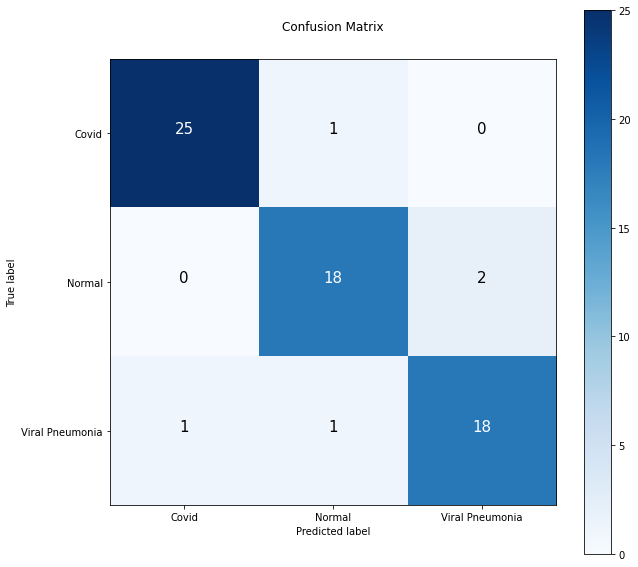

In [34]:
from helper_functions import make_confusion_matrix
make_confusion_matrix(y_true = labels,
                      y_pred = pred_classes,
                      classes = class_names)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_true = labels,
                            y_pred = pred_classes))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       0.90      0.90      0.90        20
           2       0.90      0.90      0.90        20

    accuracy                           0.92        66
   macro avg       0.92      0.92      0.92        66
weighted avg       0.92      0.92      0.92        66



In [36]:
# Get a dict of classification report
classification_report_dict = classification_report(labels, pred_classes, output_dict=True)

# Create empty dictionary
class_f1_scores = {}
# Loop through classification report dictionary items
for k,v in classification_report_dict.items():
  if k=="accuracy":
    break;
  else:
    # Add class names and f1_scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v['f1-score']

import pandas as pd
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores

,class_name,f1-score
0,Covid,0.961538
1,Normal,0.900000
2,Viral Pneumonia,0.900000


In [37]:
import pandas as pd
pred_df = pd.DataFrame({'y_true': labels,
                        'y_pred': pred_classes,
                        'pred_conf': pred_prob.max(axis=1),
                        'y_true_classname': [class_names[i] for i in labels],
                        'y_pred_classname': [class_names[i] for i in pred_classes]})
pred_df['pred_correct'] = pred_df['y_true'] == pred_df['y_pred']

In [38]:
top_100_wrong = pred_df[pred_df['pred_correct']==False].sort_values('pred_conf',ascending=False)
top_100_wrong

,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
35,1,2,0.983013,Normal,Viral Pneumonia,False
61,2,0,0.749418,Viral Pneumonia,Covid,False
9,0,1,0.687906,Covid,Normal,False
31,1,2,0.676570,Normal,Viral Pneumonia,False
54,2,1,0.434953,Viral Pneumonia,Normal,False


## Make predictions on single image

(1, 224, 224, 3)


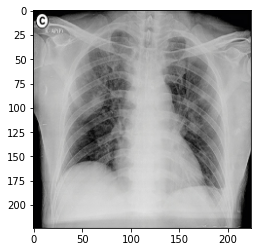

In [43]:
import tensorflow as tf
import json, codecs
import matplotlib.pyplot as plt

filename = '0120.jpg'
img_shape = 224

# read the image
img = tf.io.read_file(filename)

# Decode the read file into a tensor
img = tf.image.decode_image(img) # decode to array

# resize the image
img = tf.image.resize(img, size=[img_shape,img_shape])

# turn to 1D
# img = tf.image.rgb_to_grayscale(img)

# rescale the image(get all value between 0 and 1)
img = img/255.

plt.imshow(img);

img = tf.expand_dims(img, axis=0)

print(img.shape)

img = img.numpy().tolist()

json.dump(img, codecs.open("0120.json", "w", encoding = "utf-8"))

In [44]:
f = open('0120.json')
image = json.load(f)
single_pred_prob = model_1.predict(image)
single_pred = tf.argmax(single_pred_prob, axis=1)
single_pred_prob, single_pred, class_names[0]

(array([[9.9994767e-01, 3.0968866e-05, 2.1293725e-05]], dtype=float32),
 <tf.Tensor: shape=(1,), dtype=int64, numpy=array([0])>,
 'Covid')